# Shaping de la forward curve markit

## Forward Curve TGP

In [121]:
import pandas as pd
data = kdb(date = "2022-09-20", index = "FRANCE_BL")

Data retrieved from kdb for 2022-09-20


In [134]:
#data = data.loc[data["Contract type"] == "Quarter",  :]
#data["Start Date"] = pd.to_datetime(data['Start Date'])
data.dropna(subset = "Markit",  inplace = True)
data.head(10)

,Index,Start Date,Contract type,TGP,Markit,Markit Std,EEX,Ice,Skylight,Risk,Rule,Validation_status,Comment
Date,,,,,,,,,,,,,
2022-09-20,FRANCE_BL,2022-10-01,Quarter,955.000000,961.215777,6.736205,950.98,956.452174,962.047494,NaN,fixed-0.20.2,Validated,Within spectronpower Bid and spectronpower Ask
2022-09-20,FRANCE_BL,2023-01-01,Quarter,1010.000000,1002.199926,2.520090,998.75,1045.158333,1004.878743,NaN,fixed-0.20.2,Validated,Within trayport Bid and trayport Ask
2022-09-20,FRANCE_BL,2023-04-01,Quarter,379.805560,378.814741,6.853489,364.55,440.669341,380.693557,NaN,fixed-0.20.2,Validated,Total's price within the threshold -0.2 and 0....
2022-09-20,FRANCE_BL,2023-07-01,Quarter,372.953188,362.851765,8.252325,346.35,415.030000,366.530387,NaN,fixed-0.20.2,NotValidated,
2022-09-20,FRANCE_BL,2023-10-01,Quarter,602.103269,580.259170,15.083253,553.83,626.004239,585.096806,NaN,fixed-0.20.2,NotValidated,
2022-09-20,FRANCE_BL,2024-01-01,Quarter,445.264903,542.633394,6.923052,535.00,589.906703,546.558281,NaN,fixed-0.20.2,NotValidated,
2022-09-20,FRANCE_BL,2024-04-01,Quarter,195.443071,138.601449,5.833806,135.67,175.715165,137.045098,NaN,fixed-0.20.2,NotValidated,
2022-09-20,FRANCE_BL,2024-07-01,Quarter,180.177656,130.956393,9.798080,149.00,174.099348,135.277377,NaN,fixed-0.20.2,NotValidated,
2022-09-20,FRANCE_BL,2024-10-01,Quarter,264.187282,259.934792,15.857446,234.04,284.608913,261.510067,NaN,fixed-0.20.2,Validated,ok with markit std


In [226]:
datar = data[["Markit", "Start Date"]]
datar = datar.set_index("Start Date")
datar.index = pd.to_datetime(datar.index)
datar = datar["Markit"]
datar

Start Date
2022-10-01     961.215777
2023-01-01    1002.199926
2023-04-01     378.814741
2023-07-01     362.851765
2023-10-01     580.259170
2024-01-01     542.633394
2024-04-01     138.601449
2024-07-01     130.956393
2024-10-01     259.934792
2025-01-01     270.434931
2025-04-01     153.891632
2025-07-01     161.713849
2025-10-01     240.497613
2026-01-01     244.524849
2026-04-01     131.980137
2026-07-01     134.725920
2026-10-01     203.508483
2027-01-01     206.351108
2027-04-01     116.957702
2027-07-01     117.732368
2027-10-01     168.864759
2028-01-01     174.844629
2028-04-01     120.282534
2028-07-01     122.854303
Name: Markit, dtype: float64

In [240]:
from ratios.ratio import Ratio
from ratios.scope import Scope
from ratios.smoothings.integral_cubic_spline import IntegralCubicSpline
from ratios.profiles.baseload import Baseload
from ratios.profiles.filters.hours import Hours
from ratios.profiles.filters.months import Months
from ratios.profiles.filters.years import Years
from ratios.profiles.off_peak import OffPeak, OverlappingIndexesPeakAndOffPeak
from ratios.profiles.peak import Peak
from ratios.scope import Scope

# First we define a {Baseload}
historical_baseload = Baseload(datar)

# Let's compute the {Ratio} base on a matrix line/column 
# Line is Denominator when Column is Nominator
ratio_month_day = Ratio(historical_baseload, 
                        line_scope=[ Scope.YEAR_NUMBER, Scope.QUARTER],
                        column_scope=[Scope.MONTH_NAME]) \
    .compute(numerator_computing_scope=[Scope.QUARTER, Scope.MONTH_NAME]).evaluate()

print(ratio_month_day.matrix_rate)

Start Date                April   January      July   October
Start Date Start Date                                        
2022       4                NaN       NaN       NaN  0.418616
2023       1                NaN  0.405938       NaN       NaN
           2           0.457800       NaN       NaN       NaN
           3                NaN       NaN  0.473487       NaN
           4                NaN       NaN       NaN  0.693449
2024       1                NaN  0.749735       NaN       NaN
           2           1.251223       NaN       NaN       NaN
           3                NaN       NaN  1.311931       NaN
           4                NaN       NaN       NaN  1.548004
2025       1                NaN  1.504360       NaN       NaN
           2           1.126906       NaN       NaN       NaN
           3                NaN       NaN  1.062406       NaN
           4                NaN       NaN       NaN  1.673115
2026       1                NaN  1.663763       NaN       NaN
        

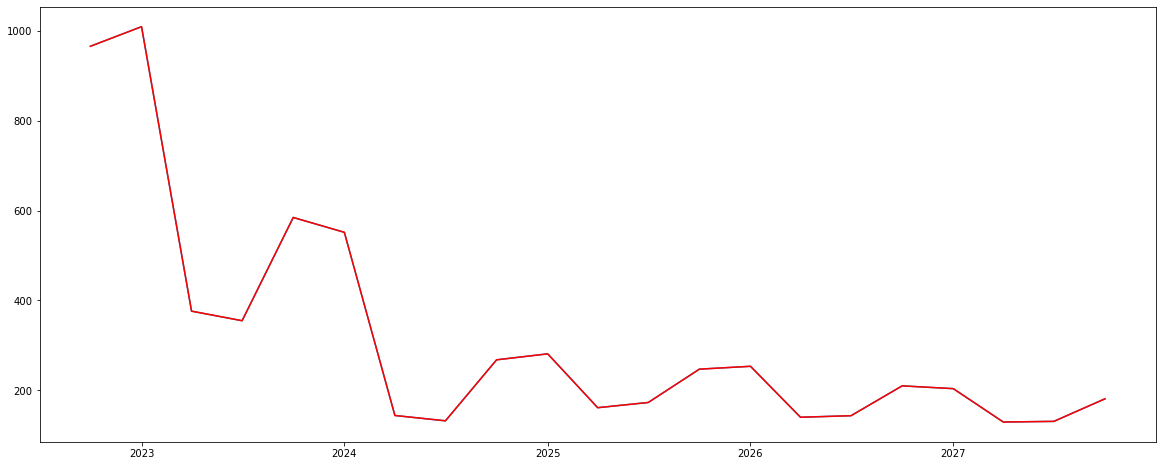

In [55]:
plt.rcParams['figure.figsize'] = (20, 8)
from scipy.signal import savgol_filter
yhat = savgol_filter(data["Markit"], 7, 6) # window size 51, polynomial order 3

plt.plot(data["Start Date"],data["Markit"])
plt.plot(data["Start Date"],yhat, color='red')
plt.show()

In [73]:
def kdb(date:str, index:str):

    print (f"Data retrieved from kdb for {date}")
    kdb_date = date
    kdb_date = kdb_date.replace('-','.')
 
    ## Open a connection to kdb 
    q = qconnection.QConnection(host = 'kdb.dts.corp.local',port = 8004,username = 'Administrator',password = 'password', pandas = True)

    ## Retrieves data from KDB
    q.open()
    kdb_trades=q.sendSync('.engie.getAssessmentsPrices('+kdb_date+')')
    q.close() 

    ## kdb symbols/strings returned as python byte strings -- convert these to regular strings 
    bstr_cols = kdb_trades.select_dtypes([object]).columns
    for i in bstr_cols:
        kdb_trades[i]=kdb_trades[i].apply(lambda x: x.decode('latin'))

In [83]:
def kdb(date:str):

    print (f"Data retrieved from kdb for {date}")
    kdb_date = date
    kdb_date = kdb_date.replace('-','.')
 
    ## Open a connection to kdb 
    q = qconnection.QConnection(host = 'kdb.dts.corp.local',port = 8004,username = 'Administrator',password = 'password', pandas = True)

    ## Retrieves data from KDB
    q.open()
    kdb_trades=q.sendSync('.engie.getAssessmentsPrices('+kdb_date+')')
    q.close() 

    ## kdb symbols/strings returned as python byte strings -- convert these to regular strings 
    bstr_cols = kdb_trades.select_dtypes([object]).columns
    for i in bstr_cols:
        kdb_trades[i]=kdb_trades[i].apply(lambda x: x.decode('latin'))
    return kdb_trades

In [96]:
a = kdb(date = "2022-09-19")
print(a.columns)
print(a.shape[1])

Data retrieved from kdb for 2022-09-19
Index(['date', 'ASSESS_DATE', 'INDEX1', 'INDEX2', 'CONTRACT',
       'CONTRACT1_START_DATE', 'CONTRACT1_END_DATE', 'CONTRACT2_START_DATE',
       'CONTRACT2_END_DATE', 'PRODUCT', 'PRODUCT_TYPE', 'PROFILE',
       'CONTRACT_TYPE', 'CCY', 'QUANTITY_UNIT', 'RELTAG', 'COMMENT_ID',
       'DTINSERTED', 'LOCATION', 'TYPE', 'REGULATORY_AREA', 'TGP_PRICE',
       'RULE', 'markit accepted_prices', 'markit consensus',
       'markit contributors', 'markit deviation', 'iceeodfutures',
       'iceeodfutures high', 'iceeodfutures low', 'herengas', 'herengas ask',
       'herengas bid', 'skylight consensus', 'trayport_ask', 'trayport_bid',
       'powernextgasfutures', 'herenpower', 'herenpower ask', 'herenpower bid',
       'herenpower high', 'herenpower low', 'trayport', 'cmefutures',
       'nasdaqger', 'icefutures', 'iceclearedgas', 'nasdaqomx',
       'nasdaqomx ask', 'nasdaqomx bid', 'omipgas', 'omipelec',
       'ngxclearedgasus', 'platts', 'aemopower', 

In [97]:
b = kdb(date = "2022-09-16")
print(b.columns)
print(b.shape[1])

Data retrieved from kdb for 2022-09-16
Index(['date', 'ASSESS_DATE', 'INDEX1', 'INDEX2', 'CONTRACT',
       'CONTRACT1_START_DATE', 'CONTRACT1_END_DATE', 'CONTRACT2_START_DATE',
       'CONTRACT2_END_DATE', 'PRODUCT', 'PRODUCT_TYPE', 'PROFILE',
       'CONTRACT_TYPE', 'CCY', 'QUANTITY_UNIT', 'RELTAG', 'COMMENT_ID',
       'DTINSERTED', 'LOCATION', 'TYPE', 'REGULATORY_AREA', 'TGP_PRICE',
       'RULE', 'markit accepted_prices', 'markit consensus',
       'markit contributors', 'markit deviation', 'trayport', 'trayport_bid',
       'iceeodfutures', 'iceeodfutures high', 'iceeodfutures low',
       'spectroncoal_ask', 'spectroncoal_bid', 'trayport_ask', 'herengas',
       'herengas ask', 'herengas bid', 'eexpower', 'skylight consensus',
       'powernextgasfutures', 'arguspower', 'arguspower high',
       'arguspower low', 'herenpower', 'herenpower ask', 'herenpower bid',
       'herenpower high', 'herenpower low', 'spectronpower_ask',
       'spectronpower_bid', 'cmefutures', 'nasdaqger'

In [101]:
from kdb import *
data = kdb(date = "2022-09-19", index = "GERMANY_BL")
data = data.loc[data["Contract type"] == "Quarter",  :]

Data retrieved from kdb for 2022-09-19


KeyError: "['eexpower'] not in index"

In [ ]:
data

,Index,Start Date,Contract type,TGP,Markit,Markit Std,EEX,Ice,Skylight,Risk,Rule,Validation_status,Comment
Date,,,,,,,,,,,,,
2022-09-16,GERMANY_BL,2022-10-01,Quarter,490.000000,490.630286,3.018735,493.11,488.510217,489.950411,NaN,fixed-0.20.2,Validated,Total's price within the threshold -0.2 and 0....
2022-09-16,GERMANY_BL,2023-01-01,Quarter,690.000000,691.171658,2.172919,694.00,687.599111,689.526746,NaN,fixed-0.20.2,Validated,Within trayport Bid and trayport Ask
2022-09-16,GERMANY_BL,2023-04-01,Quarter,413.284157,415.419009,1.301676,415.00,415.371538,414.404279,NaN,fixed-0.20.2,Validated,"7. MO disagrees, Traders to update curve"
2022-09-16,GERMANY_BL,2023-07-01,Quarter,402.270124,403.598852,1.593177,408.00,403.176196,402.766531,NaN,fixed-0.20.2,Validated,Within trayport Bid and trayport Ask
2022-09-16,GERMANY_BL,2023-10-01,Quarter,537.307503,535.026009,2.466220,529.73,539.112174,534.398875,NaN,fixed-0.20.2,Validated,Within trayport Bid and trayport Ask
2022-09-16,GERMANY_BL,2024-01-01,Quarter,444.573170,444.450587,8.834835,450.58,431.909011,437.281875,NaN,fixed-0.20.2,Validated,Total's price within the threshold -0.2 and 0....
2022-09-16,GERMANY_BL,2024-04-01,Quarter,146.353578,152.299609,3.986891,152.87,150.468132,149.189872,NaN,fixed-0.20.2,Validated,"7. MO disagrees, Traders to update curve"
2022-09-16,GERMANY_BL,2024-07-01,Quarter,141.491452,146.342748,3.902308,144.11,144.232391,144.560183,NaN,fixed-0.20.2,Validated,"7. MO disagrees, Traders to update curve"
2022-09-16,GERMANY_BL,2024-10-01,Quarter,236.744047,230.073371,9.111924,231.00,244.482065,238.745250,NaN,fixed-0.20.2,Validated,ok as price is between markit and ice
